In [1]:
from zfish.utils import *
from zfish.local_path import *
from zfish.importEphys import import12chFlt

code_id = "5002 - Nose Oscillation"
f_denoise = pd.read_excel(r"D:\EnData\Reward\Experiment Records.xlsx", sheet_name="de_light_noise")
loc = join(figpath, code_id)
mkdir(loc)
pass

        D:\Yao Shuyang\En Lab\Results\5002 - Nose Oscillation is already existed!


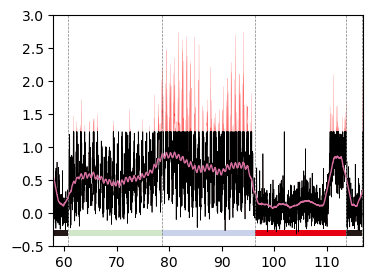

In [9]:
def visualize_process_curve(dir_path, title, is_fixed_xlim=True):
    res = import12chFlt(dir_path)
    
    idx = np.where(res['behav_pos'] < 10)[0][0]

    ch0 = res['fltCh0'][idx:][::120]
    ch1 = res['fltCh1'][idx:][::120]

    thre_ch0 = np.percentile(np.abs(ch0), 90)
    thre_ch1 = np.percentile(np.abs(ch1), 90)
    
    ch0_raw = ch0.copy()
    
    ch0 = np.clip(ch0, -thre_ch0, thre_ch0)
    ch1 = np.clip(ch1, -thre_ch1, thre_ch1)

    t = res['behav_time'][idx:][::120][50:-50]
    x = res['behav_pos'][idx:][::120][50:-50]
    x_label = np.zeros_like(x, dtype= np.int64)
    x_label[x <= 32] = 1
    x_label[(x > 32) & (x <= 64)] = 2
    x_label[(x > 64) & (x <= 96)] = 3
    x_label[(x > 96)] = 4
    colors = np.array(["#d1e7ca", "#cad2eb", "#e60012", "#231815"])
    change_label_idx = np.concatenate([[0], np.where(np.ediff1d(x_label) != 0)[0]+1, [len(x_label)]])
    
    smooth_ch0 = np.convolve(ch0, np.ones(100)/100, mode='same')[50:-50]
    vmin = np.nanmin(smooth_ch0) 
    vmax = np.nanmax(smooth_ch0) 
    smooth_ch0 = (smooth_ch0 - np.nanmin(smooth_ch0)) / (np.nanmax(np.abs(smooth_ch0)) - np.nanmin(np.abs(smooth_ch0))) * 0.95
    smooth_ch0 += 0.05
    smooth_ch1 = np.convolve(ch1, np.ones(100)/100, mode='same')[50:-50]
    smooth_ch1 = (smooth_ch1 - np.nanmin(smooth_ch1)) / (np.nanmax(np.abs(smooth_ch1)) - np.nanmin(np.abs(smooth_ch1))) * 0.95
    smooth_ch1 += 0.05

    fig = plt.figure(figsize=(4, 3))
    ax = plt.axes()
    ax.plot(t, (ch0_raw[50:-50] - vmin) / (vmax - vmin), color = 'r', linewidth=0.1)
    ax.plot(t, (ch0[50:-50] - vmin) / (vmax - vmin), color = 'k', linewidth=0.5)
    ax.plot(t, smooth_ch0, label='Channel 0', color='#d56e9e', linewidth=1)
    y_max = max(np.abs(ax.get_ylim()[0]), np.abs(ax.get_ylim()[1]))
    for i in range(len(change_label_idx)-1):
        ax.fill_betweenx(
            [-0.35, -0.25], 
            t[change_label_idx[i]], 
            t[change_label_idx[i+1]-1], 
            color=colors[x_label[change_label_idx[i]]-1], 
            edgecolor=None
        )
    idx = np.where(np.ediff1d(x_label) != 0)[0]
    for i in idx:
        ax.axvline(t[i], color='gray', linestyle='--', linewidth=0.5)
        
    if is_fixed_xlim:
        ax.set_xlim(58, 117)
    ax.set_ylim(-0.5, 3)
    plt.savefig(join(loc, "Data Process Illustration.png"), dpi=600)
    plt.savefig(join(loc, "Data Process Illustration.svg"), dpi=600)
    plt.show()

visualize_process_curve(f_denoise['Ephys path'][1], "123")

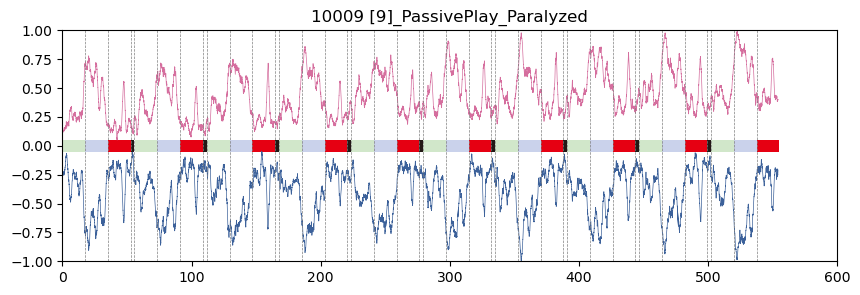

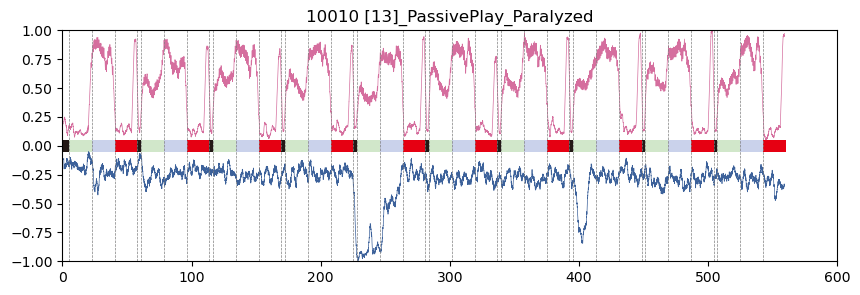

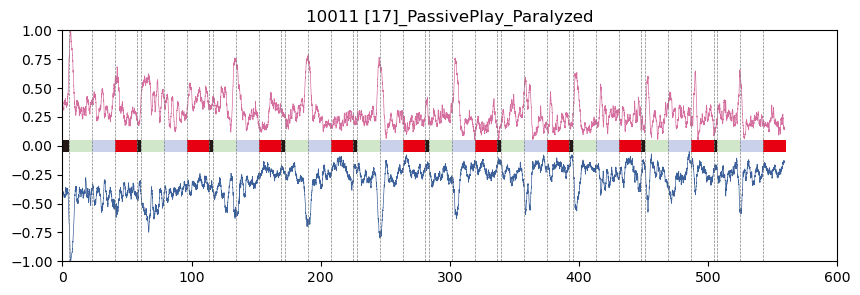

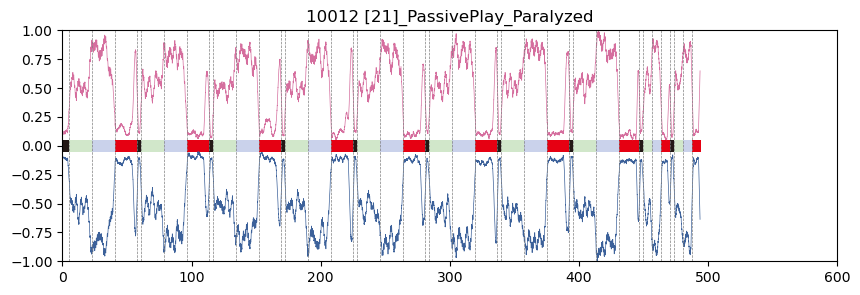

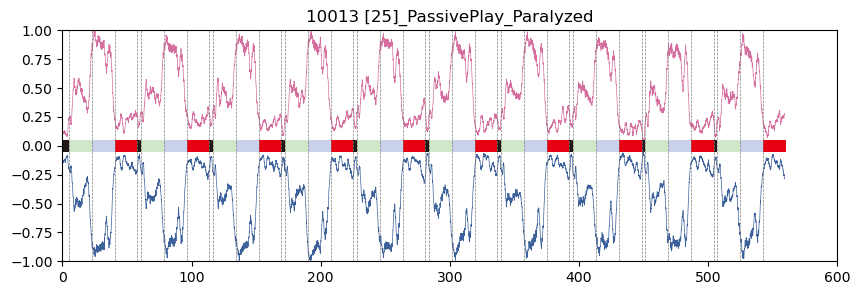

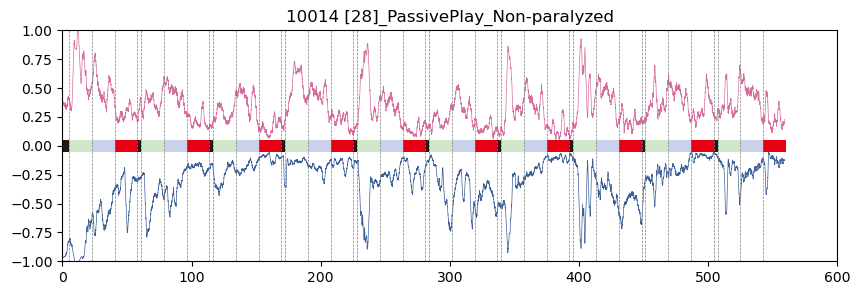

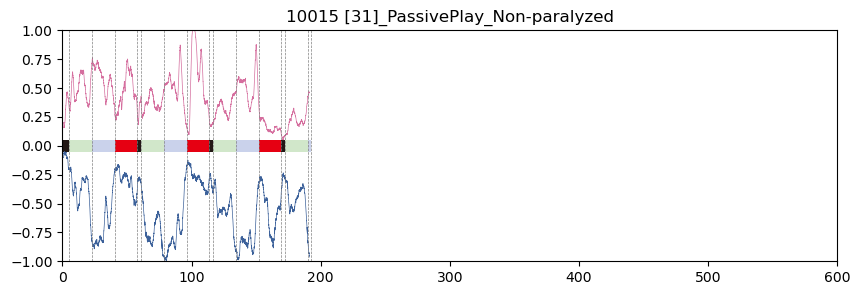

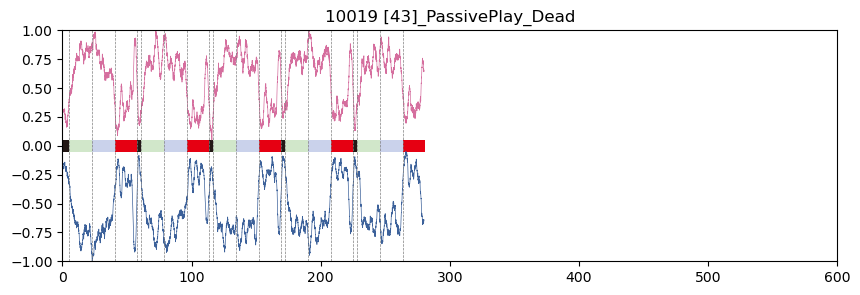

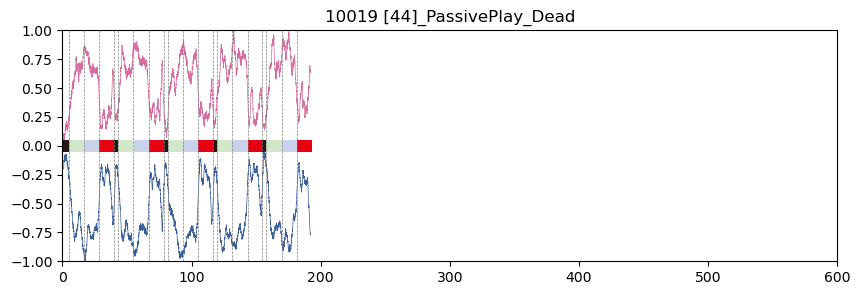

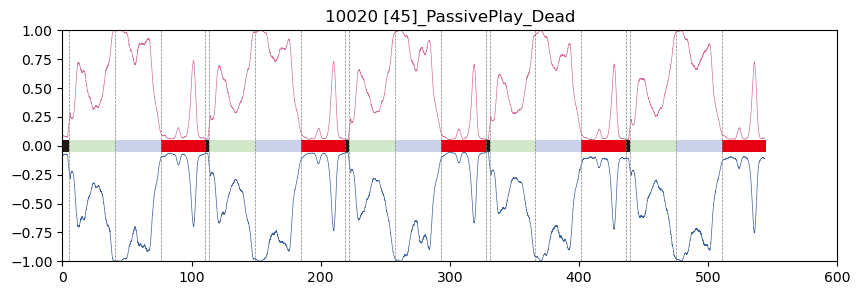

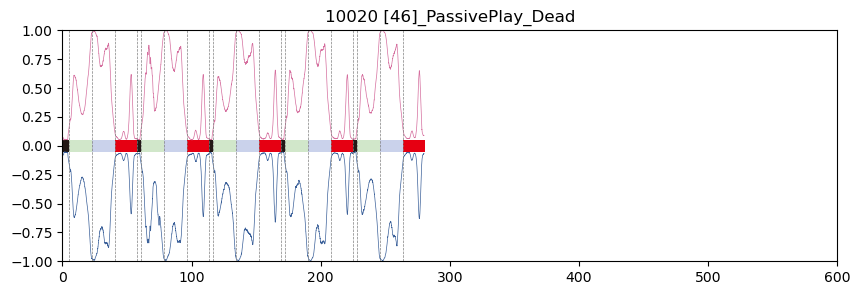

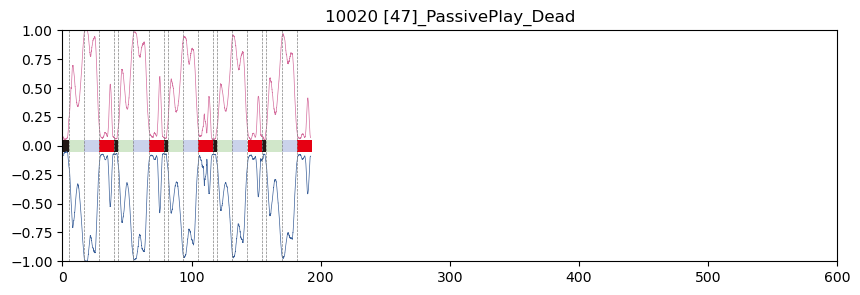

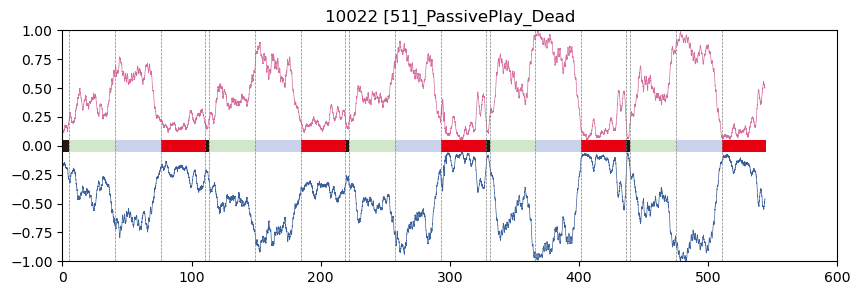

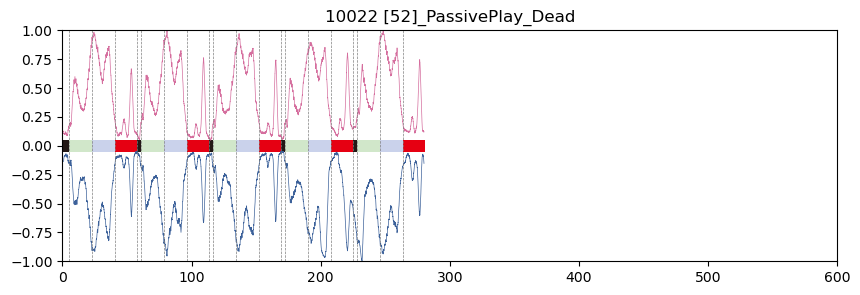

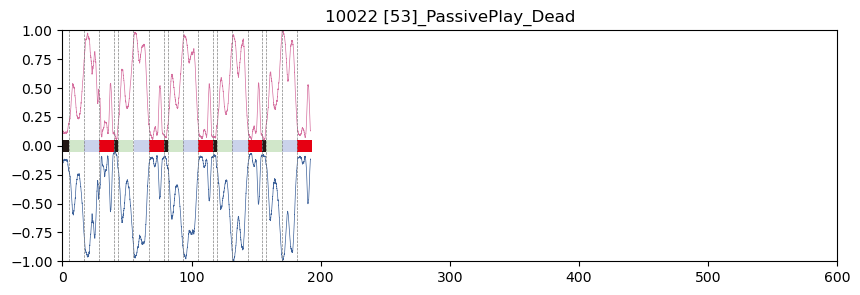

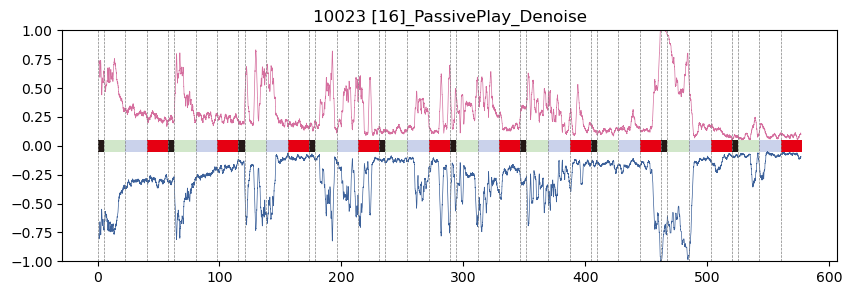

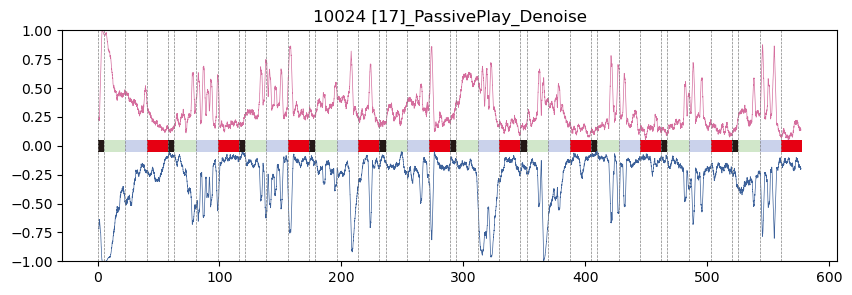

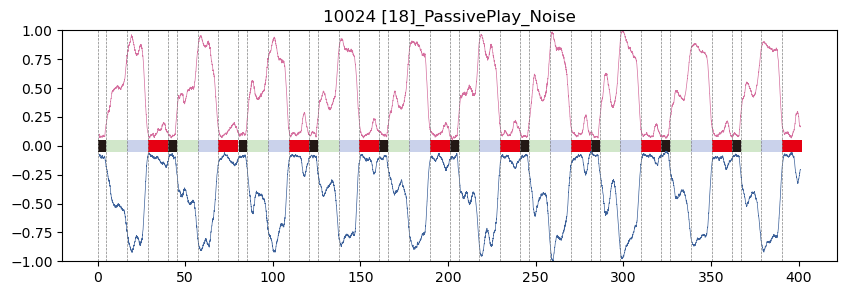

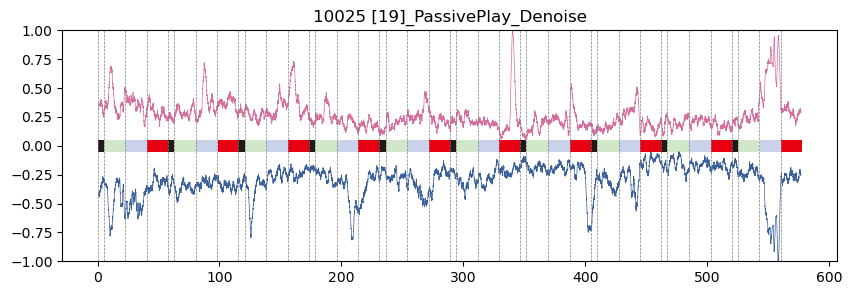

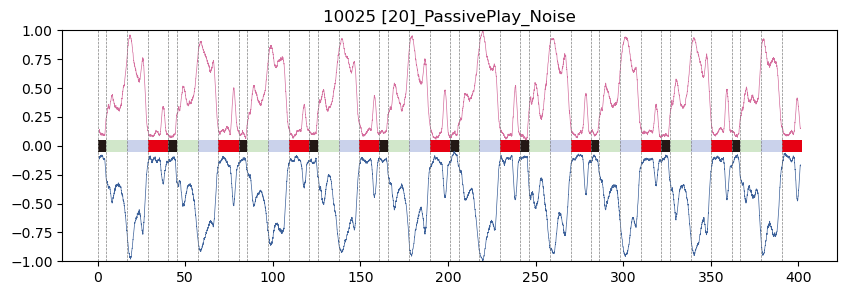

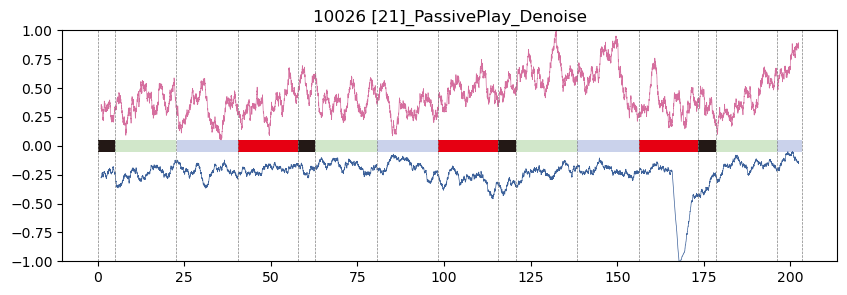

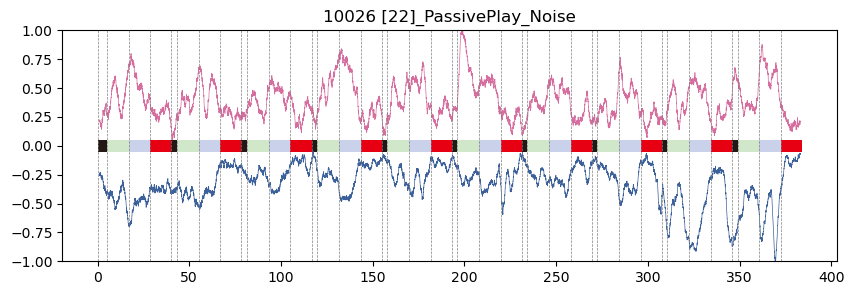

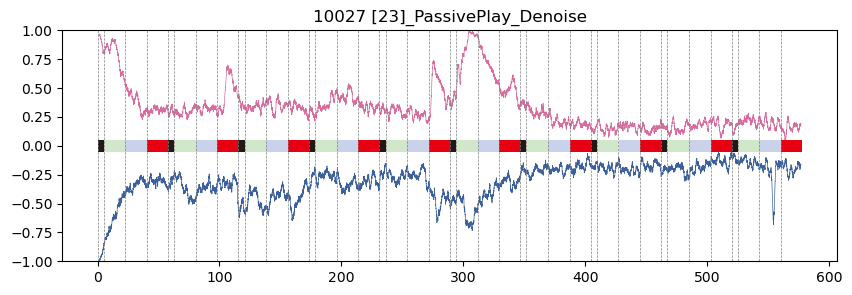

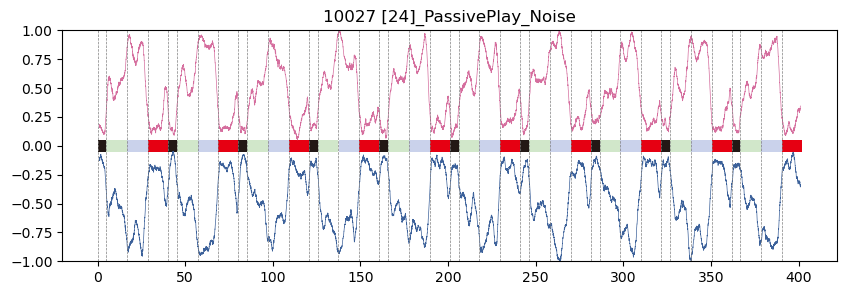

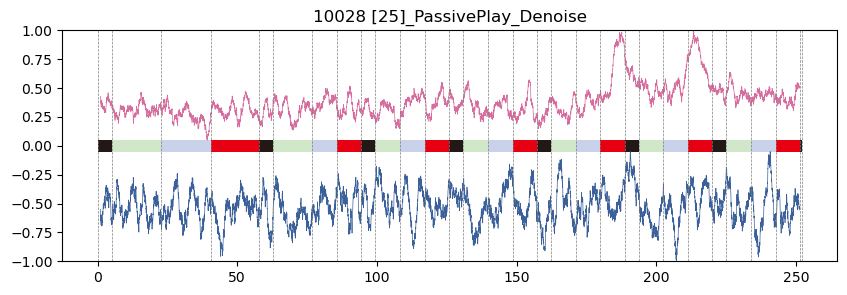

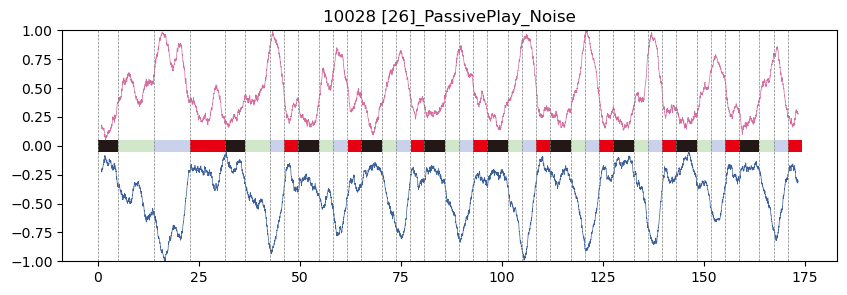

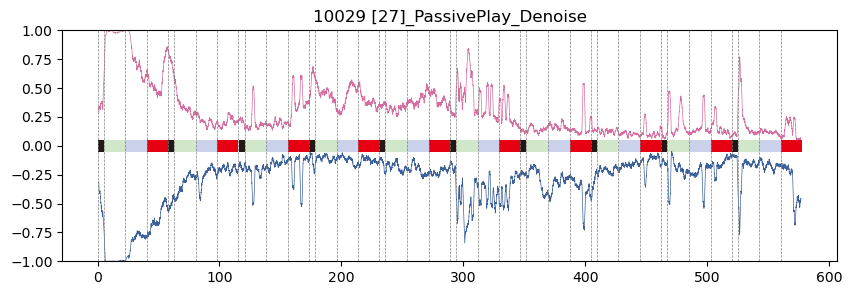

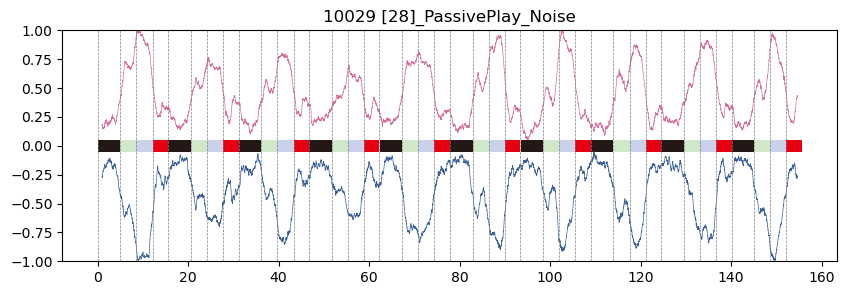

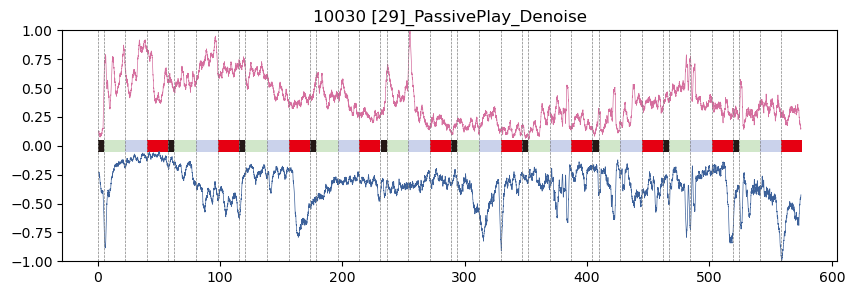

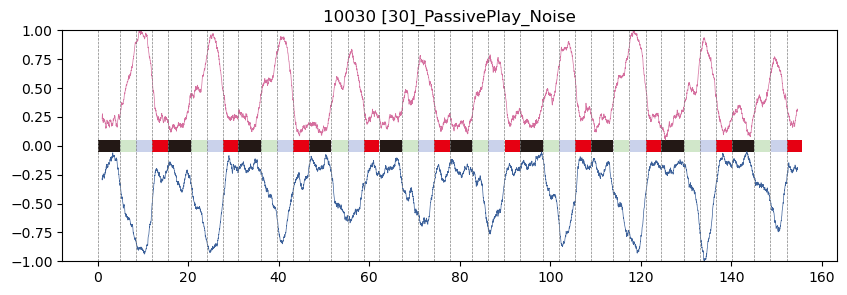

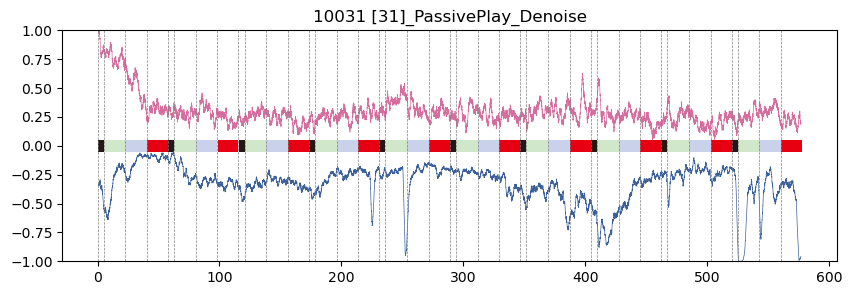

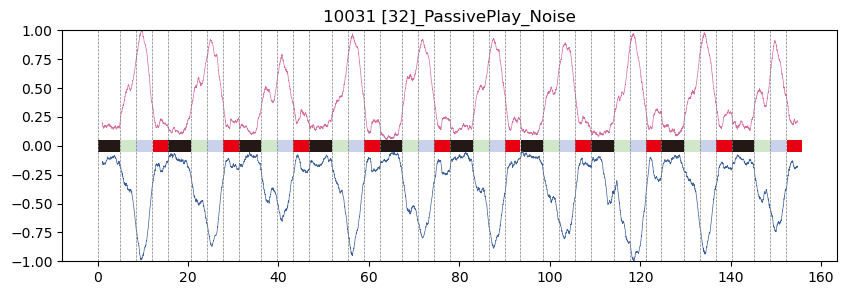

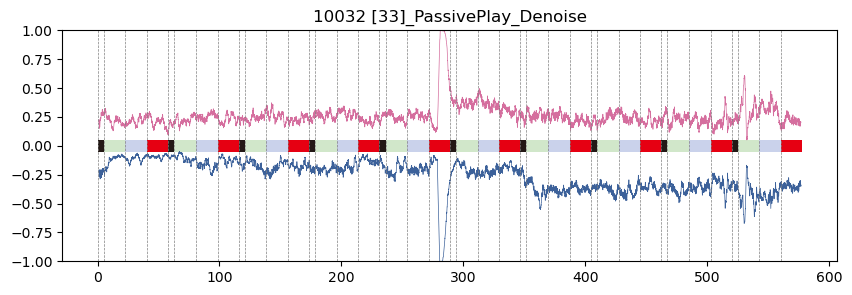

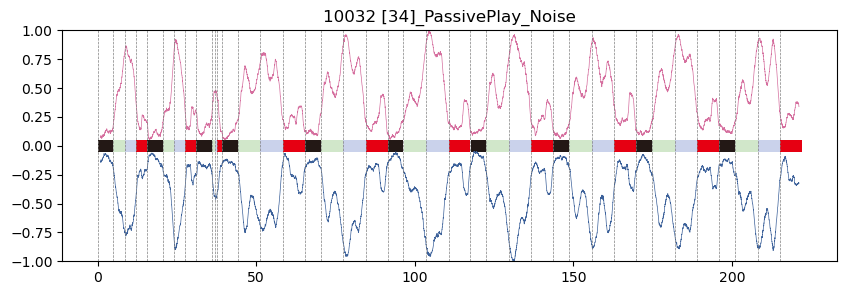

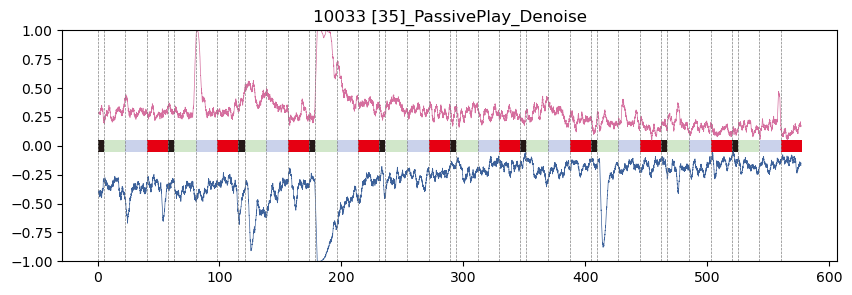

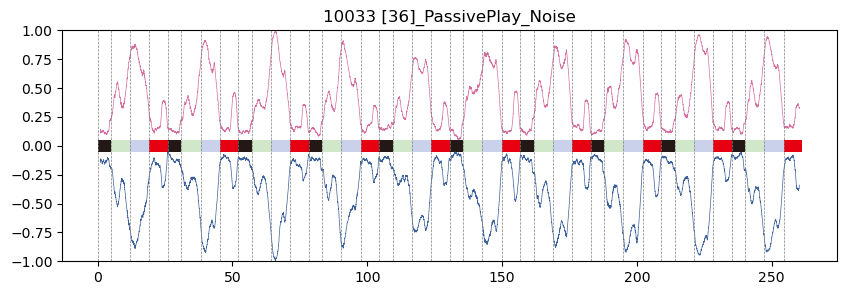

In [11]:
import numpy as np

def process_data(dir_path: str, title: str, is_fixed_xlim: bool = True):
    res = import12chFlt(dir_path)
    
    idx = np.where(res['behav_pos'] < 10)[0][0]

    ch0 = res['fltCh0'][idx:][::120]
    ch1 = res['fltCh1'][idx:][::120]

    thre_ch0 = np.percentile(np.abs(ch0), 90)
    thre_ch1 = np.percentile(np.abs(ch1), 90)
    
    ch0 = np.clip(ch0, -thre_ch0, thre_ch0)
    ch1 = np.clip(ch1, -thre_ch1, thre_ch1)

    t = res['behav_time'][idx:][::120]
    x = res['behav_pos'][idx:][::120]
    x_label = np.zeros_like(x, dtype= np.int64)
    x_label[x <= 32] = 1
    x_label[(x > 32) & (x <= 64)] = 2
    x_label[(x > 64) & (x <= 96)] = 3
    x_label[(x > 96)] = 4
    colors = np.array(["#d1e7ca", "#cad2eb", "#e60012", "#231815"])
    change_label_idx = np.concatenate([[0], np.where(np.ediff1d(x_label) != 0)[0]+1, [len(x_label)]])

    smooth_ch0 = np.convolve(ch0, np.ones(100)/100, mode='same')[50:-50]
    smooth_ch0 = (smooth_ch0 - np.nanmin(smooth_ch0)) / (np.nanmax(np.abs(smooth_ch0)) - np.nanmin(np.abs(smooth_ch0))) * 0.95
    smooth_ch0 += 0.05
    smooth_ch1 = np.convolve(ch1, np.ones(100)/100, mode='same')[50:-50]
    smooth_ch1 = (smooth_ch1 - np.nanmin(smooth_ch1)) / (np.nanmax(np.abs(smooth_ch1)) - np.nanmin(np.abs(smooth_ch1))) * 0.95
    smooth_ch1 += 0.05

    fig = plt.figure(figsize=(10, 3))
    ax = plt.axes()
    ax.plot(t[50:-50], smooth_ch0, label='Channel 0', color='#d56e9e', linewidth=0.5)
    ax.plot(t[50:-50], -smooth_ch1, label='Channel 1', color='#3c619a', linewidth=0.5)
    y_max = max(np.abs(ax.get_ylim()[0]), np.abs(ax.get_ylim()[1]))
    ax.set_ylim(-1, 1)
    for i in range(len(change_label_idx)-1):
        ax.fill_betweenx(
            [-0.05, 0.05], 
            t[change_label_idx[i]], 
            t[change_label_idx[i+1]-1], 
            color=colors[x_label[change_label_idx[i]]-1], 
            edgecolor=None
        )
    idx = np.where(np.ediff1d(x_label) != 0)[0]
    for i in idx:
        ax.axvline(t[i], color='gray', linestyle='--', linewidth=0.5)
    #print(f"Passive Gain: {res['pass_speed'][0]:.5f} - {res['pass_speed'][-1]:.5f}")
    #print(f"Active Gain: {res['active_gain'][0]:.5f} - {res['active_gain'][-1]:.5f}")
    ax.set_title(title)
    if is_fixed_xlim:
        ax.set_xlim(0, 600)
    plt.savefig(join(loc, f"{title}.png"), dpi=600)
    plt.savefig(join(loc, f"{title}.svg"), dpi=600)
    plt.show()

for i in [9, 13, 17, 21, 25, 28, 31, 43, 44, 45, 46, 47, 51, 52, 53]:
    process_data(
        ff1['Ephys path'][i], 
        f"{ff1['ID'][i]} [{i}]_{ff1['Paradigm'][i]}_{ff1['Group'][i]}"
    )
for i in range(16, len(f_denoise)):
    process_data(
        f_denoise['Ephys path'][i], 
        f"{f_denoise['ID'][i]} [{i}]_{f_denoise['Paradigm'][i]}_{f_denoise['Group'][i]}",
        is_fixed_xlim=False
    ) 

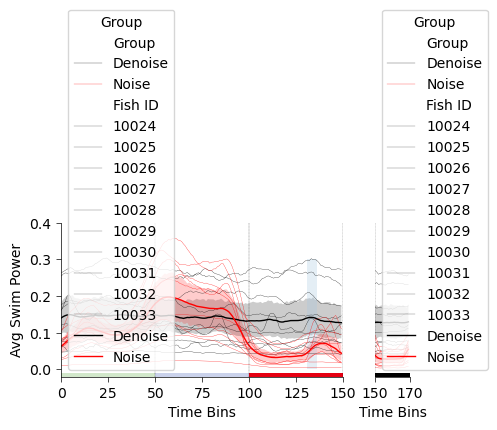

In [58]:
def trial_averaged_data(dir_path: str, dir_path_2: str):
    res = import12chFlt(dir_path)
    res2 = import12chFlt(dir_path_2)
    
    ch0s, ch1s = [], []
    ts, xs, x_labels = [], [], []
    smooth_ch0s, smooth_ch1s = [], []
    for rs in [res, res2]:
        idx = np.where((rs['behav_pos'] > 0.01) & (rs['behav_pos'] < 10))[0][0]

        ch0 = rs['fltCh0'][idx:][::120]
        ch1 = rs['fltCh1'][idx:][::120]

        thre_ch0 = np.percentile(np.abs(ch0), 90)
        thre_ch1 = np.percentile(np.abs(ch1), 90)
        
        ch0 = np.clip(ch0, -thre_ch0, thre_ch0)
        ch1 = np.clip(ch1, -thre_ch1, thre_ch1)

        t = rs['behav_time'][idx:][::120][50:-50]
        x = rs['behav_pos'][idx:][::120][50:-50]
        x_label = np.zeros_like(x, dtype= np.int64)
        x_label[x <= 32] = 1
        x_label[(x > 32) & (x <= 64)] = 2
        x_label[(x > 64 ) & (x <= 96)] = 3
        x_label[(x > 96)] = 4

        smooth_ch0 = np.convolve(ch0, np.ones(100)/100, mode='same')[50:-50]
        smooth_ch1 = np.convolve(ch1, np.ones(100)/100, mode='same')[50:-50]
        
        ch0s.append(ch0)
        ch1s.append(ch1)
        ts.append(t)
        xs.append(x)
        x_labels.append(x_label)
        smooth_ch0s.append(smooth_ch0)
        smooth_ch1s.append(smooth_ch1)
        
    vmin = np.min([np.nanmin(smooth_ch0s[0]), np.nanmin(smooth_ch0s[1])])
    vmax = np.max([np.nanmax(smooth_ch1s[0]), np.nanmax(smooth_ch1s[1])])
    smooth_ch0s[0] = (smooth_ch0s[0] - vmin) / (vmax - vmin)
    smooth_ch0s[1] = (smooth_ch0s[1] - vmin) / (vmax - vmin)

    avg_chs = [np.zeros(150, dtype=np.float64)] * 2
    black_avg_chs = [np.zeros(20, dtype=np.float64)] * 2
    
    for n in range(2):
        ch0 = ch0s[n]
        ch1 = ch1s[n]
        t = ts[n]
        x = xs[n]
        x_label = x_labels[n]
        smooth_ch0 = smooth_ch0s[n]
        smooth_ch1 = smooth_ch1s[n]
        
        beg_idx = np.concatenate([[0], np.where(
            (np.diff(x_label) < 0) &
            (x_label[1:] == 1)
        )[0] + 1])
        end_idx = np.where(
            (np.diff(x_label) == 1) &
            (x_label[:-1] == 3)
        )[0] + 1
        
        if beg_idx.shape[0] > end_idx.shape[0]:
            end_idx = np.concatenate([end_idx, [len(x_label)]])
        
        trial_avg_ch = np.zeros((len(beg_idx), 150, 2), dtype=np.float64)
        for i in range(len(beg_idx)):
            t_trial = t[end_idx[i]-1] - t[beg_idx[i]]
            tt = t[beg_idx[i]:end_idx[i]] - t[beg_idx[i]]
            ch0_trial = smooth_ch0[beg_idx[i]:end_idx[i]]
            ch1_trial = smooth_ch1[beg_idx[i]:end_idx[i]]
            
            trial_avg_ch[i, :, 0] = scipy.stats.binned_statistic(
                tt, ch0_trial, statistic='mean', bins=150, range=(0, t_trial+1e-6)
            )[0]
            trial_avg_ch[i, :, 1] = scipy.stats.binned_statistic(
                tt, ch1_trial, statistic='mean', bins=150, range=(0, t_trial+1e-6)
            )[0]
            
        avg_ch = np.nanmean(trial_avg_ch, axis=0)
        avg_chs[n] = np.nanmean(avg_ch, axis=1)
        
        black_avg_ch = np.zeros((len(beg_idx)-1, 20, 2), dtype=np.float64)
        for i in range(len(beg_idx)-1):
            t_trial = t[beg_idx[i+1]-1] - t[end_idx[i]]
            tt = t[end_idx[i]:beg_idx[i+1]] - t[end_idx[i]]
            ch0_trial = smooth_ch0[end_idx[i]:beg_idx[i+1]]
            ch1_trial = smooth_ch1[end_idx[i]:beg_idx[i+1]]
            
            black_avg_ch[i, :, 0] = scipy.stats.binned_statistic(
                tt, ch0_trial, statistic='mean', bins=20, range=(0, t_trial+1e-6)
            )[0]
            black_avg_ch[i, :, 1] = scipy.stats.binned_statistic(
                tt, ch1_trial, statistic='mean', bins=20, range=(0, t_trial+1e-6)
            )[0]
        
        black_avg_ch = np.nanmean(black_avg_ch, axis=0)
        black_avg_chs[n] = np.nanmean(black_avg_ch, axis=1)
    return np.concatenate([avg_chs[0], black_avg_chs[0]]), np.concatenate([avg_chs[1], black_avg_chs[1]])

if exists(join(figdata, f"{code_id} [Trial Averaged].pkl")) == False:
    AvgNoise = {
        "Avg Swim Power": [],
        "Fish ID": [],
        "Time Bins": [],
        "Group": [],
        "Fish States": []
    }
    
    for i in tqdm(range(17, len(f_denoise), 2)):
        if f_denoise['is_included'][i] == 0:
            continue
        avg_ch_dn, avg_ch_n = trial_averaged_data(f_denoise['Ephys path'][i], f_denoise['Ephys path'][i+1])
        AvgNoise["Avg Swim Power"].append(np.concatenate([avg_ch_dn, avg_ch_n]))
        AvgNoise["Fish ID"].append(np.concatenate([
            np.repeat(f_denoise['ID'][i], len(avg_ch_dn)), 
            np.repeat(f_denoise['ID'][i+1], len(avg_ch_n))
        ]))
        AvgNoise["Time Bins"].append(np.concatenate([np.arange(avg_ch_dn.shape[0])]*2))
        AvgNoise["Group"].append(np.concatenate([
            np.repeat(f_denoise['Group'][i], len(avg_ch_dn)), 
            np.repeat(f_denoise['Group'][i+1], len(avg_ch_n))
        ]))
        AvgNoise["Fish States"].append(np.concatenate([
            np.repeat(f_denoise['Fish Type'][i], len(avg_ch_dn)), 
            np.repeat(f_denoise['Fish Type'][i+1], len(avg_ch_n))
        ]))

    for key in AvgNoise:
        AvgNoise[key] = np.concatenate(AvgNoise[key])
        
    with open(join(figdata, f"{code_id} [Trial Averaged].pkl"), 'wb') as f:
        pickle.dump(AvgNoise, f)
        
    AvgNoiseD = pd.DataFrame(AvgNoise)
    AvgNoiseD.to_excel(join(figdata, f"{code_id} [Trial Averaged].xlsx"), index=False)
    print(len(AvgNoiseD))
else:
    with open(join(figdata, f"{code_id} [Trial Averaged].pkl"), 'rb') as f:
        AvgNoise = pickle.load(f)

def plot_gratings(ax: Axes, y_gratings: float = 0) -> Axes:
    ax.axvline(50, color='k', linestyle='--', linewidth=0.2)
    ax.axvline(100, color='k', linestyle='--', linewidth=0.2)
    ax.axvline(150, color='k', linestyle='--', linewidth=0.2)
    ax.fill_between(
        [0, 50], 
        y_gratings,
        y_gratings + 1e-2, 
        color="#d1e7ca", 
        edgecolor=None
    )
    ax.fill_between(
        [50, 100], 
        y_gratings,
        y_gratings + 1e-2, 
        color="#cad2eb", 
        edgecolor=None
    )
    ax.fill_between(
        [100, 150], 
        y_gratings,
        y_gratings + 1e-2, 
        color="#e60012", 
        edgecolor=None
    )
    ax.fill_between(
        [150, 170],
        y_gratings,
        y_gratings + 1e-2, 
        color="k",
        edgecolor=None
    )
    opt_left, opt_right = OPTO_POS
    opt_left = 150 / 96 * opt_left
    opt_right = 150 / 96 * opt_right
    ax.fill_betweenx(
        [0, 0.3],
        opt_left,
        opt_right,
        color="#a6c8e0",
        alpha=0.3,
        edgecolor=None
    )
    return ax


fig, axes = plt.subplots(ncols=2, nrows=1, figsize=(4.5, 2), gridspec_kw={'width_ratios': [4, 0.5]})
SubData = SubDict(AvgNoise, np.where(AvgNoise['Time Bins'] < 150)[0])
ax = Clear_Axes(axes[0], close_spines=['top', 'right'], ifxticks=True, ifyticks=True)
ax = sns.lineplot(
    data=SubData, 
    x="Time Bins", 
    y="Avg Swim Power", 
    hue="Group", 
    style="Fish ID",
    palette=['k', 'r'],#['#6a9e8a', '#9575cd'],
    err_kws={'edgecolor': None},
    dashes=False,
    linewidth=0.2,
    ax=ax
)
ax = sns.lineplot(
    data=SubData, 
    x="Time Bins", 
    y="Avg Swim Power", 
    hue="Group", 
    palette=['k', 'r'],#['#6a9e8a', '#9575cd'],
    err_kws={'edgecolor': None},
    linewidth=1,
    ax=ax
)
ax = plot_gratings(ax, -0.02)
ax.set_ylim(-0.02, 0.4)
ax.set_yticks(np.linspace(0, 0.4, 5))
ax.set_xlim(0, 150)

SubData = SubDict(AvgNoise, np.where(AvgNoise['Time Bins'] >= 150)[0])
ax = Clear_Axes(axes[1], close_spines=['top', 'right', 'left'], ifxticks=True)
ax = sns.lineplot(
    data=SubData, 
    x="Time Bins", 
    y="Avg Swim Power", 
    hue="Group", 
    style="Fish ID",
    palette=['k', 'r'],
    err_kws={'edgecolor': None},
    dashes=False,
    linewidth=0.2,
    ax=ax
)
ax = sns.lineplot(
    data=SubData, 
    x="Time Bins", 
    y="Avg Swim Power", 
    hue="Group", 
    palette=['k', 'r'],
    err_kws={'edgecolor': None},
    linewidth=1,
    ax=ax
)
ax = plot_gratings(ax, -0.02)
ax.set_ylim(-0.02, 0.4)
ax.set_xlim(150, 170)
ax.set_xticks([150, 170])
plt.savefig(join(loc, "Trial Averaged Swim Power.png"), dpi=600)
plt.savefig(join(loc, "Trial Averaged Swim Power.svg"))
plt.show()


# Statistical Test

Noise - Segment 1 vs 2: TtestResult(statistic=-4.647546697505819, pvalue=0.0012062981144411564, df=9)
Noise - Segment 1 vs 3: TtestResult(statistic=5.269224498068973, pvalue=0.0005143985195546494, df=9)
Noise - Segment 1 vs 4: TtestResult(statistic=5.510350779455888, pvalue=0.0003751307298180935, df=9)
Noise - Segment 2 vs 3: TtestResult(statistic=5.090543247781876, pvalue=0.0006534491246830027, df=9)
Noise - Segment 2 vs 4: TtestResult(statistic=5.163996054365094, pvalue=0.0005919100249775753, df=9)
Noise - Segment 3 vs 4: TtestResult(statistic=4.237850959249025, pvalue=0.002181194220117647, df=9)
One-way ANOVA: F_onewayResult(statistic=12.072094874075994, pvalue=1.282563139958264e-05)

Denoise - Segment 1 vs 2: TtestResult(statistic=0.9759950174510655, pvalue=0.35456918776601953, df=9)
Denoise - Segment 1 vs 3: TtestResult(statistic=1.9096763362862577, pvalue=0.0885074362165747, df=9)
Denoise - Segment 1 vs 4: TtestResult(statistic=2.8109668891402912, pvalue=0.02034490212388953, df=9

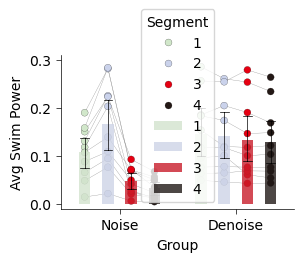

In [91]:
if exists(join(figdata, f"{code_id} [Statistical Test].pkl")) == False:
    Stats = {
        "Avg Swim Power": [],
        "Group": [],
        "Fish States": [],
        "Segment": []
    }
    for group in ['Noise', 'Denoise']:
        SubData = SubDict(AvgNoise, np.where(AvgNoise['Group'] == group)[0])
        for fish in np.unique(SubData['Fish ID']):
            for i, idx in enumerate([
                np.where((SubData['Time Bins'] < 50) & (SubData['Fish ID'] == fish))[0], 
                np.where((SubData['Time Bins'] >= 50) & (SubData['Time Bins'] < 100) & (SubData['Fish ID'] == fish))[0], 
                np.where((SubData['Time Bins'] >= 100) & (SubData['Time Bins'] < 150) & (SubData['Fish ID'] == fish))[0],
                np.where((SubData['Time Bins'] >= 150) & (SubData['Fish ID'] == fish))[0]
            ]):
                SubData2 = SubDict(SubData, idx)
                swim_power = np.nanmean(SubData2['Avg Swim Power'])
                Stats["Avg Swim Power"].append(swim_power)
                Stats["Group"].append(group)
                Stats["Fish States"].append(SubData2['Fish States'][0])
                Stats["Segment"].append(i+1)
    
    for key in Stats:
        Stats[key] = np.array(Stats[key])
                
    with open(join(figdata, f"{code_id} [Statistical Test].pkl"), 'wb') as f:
        pickle.dump(Stats, f)
        
    StatsD = pd.DataFrame(Stats)
    StatsD.to_excel(join(figdata, f"{code_id} [Statistical Test].xlsx"), index=False)
    print(len(StatsD))
else:
    with open(join(figdata, f"{code_id} [Statistical Test].pkl"), 'rb') as f:
        Stats = pickle.load(f)
        
fig = plt.figure(figsize=(3, 2))
ax = Clear_Axes(plt.axes(), close_spines=['top', 'right'], ifxticks=True, ifyticks=True)

for i, group in enumerate(['Noise', 'Denoise']):
    vals = []
    for j in range(1, 5):
        idx = np.where((Stats['Group'] == group) & (Stats['Segment'] == j))[0]
        vals.append(Stats['Avg Swim Power'][idx])
    
    for j in range(3):
        val1, val2 = vals[j], vals[j+1]
        for k in range(len(val1)):
            ax.plot(
                [i + j*0.2 - 0.3, i + j*0.2 - 0.1], 
                [val1[k], val2[k]], 
                color='gray', 
                linewidth=0.2, 
                zorder=1
            )
            
    for j in range(3):
        for k in range(j+1, 4):
            print(f"{group} - Segment {j+1} vs {k+1}: {ttest_rel(vals[j], vals[k])}")
    print(f"One-way ANOVA: {f_oneway(*vals)}\n")

sns.stripplot(
    data=Stats,
    x="Group", 
    y="Avg Swim Power", 
    hue="Segment",
    palette=["#d1e7ca", "#cad2eb", "#e60012", "#231815"],
    dodge=True,
    jitter=0,
    size=5,
    linewidth=0.15,
    ax=ax,
    zorder=1
)

sns.barplot(
    data=Stats,
    x="Group",
    y="Avg Swim Power",
    hue="Segment",
    palette=["#d1e7ca", "#cad2eb", "#e60012", "#231815"],
    alpha=0.8,
    ax=ax,
    zorder=2,
    capsize=0.3,
    err_kws={'color':'k', 'linewidth':0.5},
    gap=0.5
)
ax.set_ylim(-0.01, 0.31)
plt.savefig(join(loc, "Statistical Test.png"), dpi=600)
plt.savefig(join(loc, "Statistical Test.svg"))
plt.show()

In [4]:
idx = np.where(ff1['Paradigm'] == 'CloseLoopNavigate')[0]
for i in idx:
    res = import12chFlt(ff1['Ephys path'][i])
    print(i, ff1['ID'][i], ff1['Ephys path'][i], res['swim_speed'])

2 10002 D:\EnData\Reward\10002\session 3\res.12chFlt [0.1 0.1 0.1 ... 0.1 0.1 0.1]
6 10003 D:\EnData\Reward\10003\session 3\res.12chFlt [0.60000002 0.60000002 0.60000002 ... 0.03       0.03       0.03      ]
10 10009 D:\EnData\Reward\10009\session 3\res.12chFlt [0.006 0.006 0.006 ... 0.08  0.08  0.08 ]
14 10010 D:\EnData\Reward\10010\session 3\res.12chFlt [0.1    0.1    0.1    ... 0.0005 0.0005 0.0005]
18 10011 D:\EnData\Reward\10011\session 3\res.12chFlt [0.001 0.001 0.001 ... 0.005 0.005 0.005]
22 10012 D:\EnData\Reward\10012\session 3\res.12chFlt [0.1 0.1 0.1 ... 0.1 0.1 0.1]
26 10013 D:\EnData\Reward\10013\session 3\res.12chFlt [0.1 0.1 0.1 ... 0.1 0.1 0.1]
29 10014 D:\EnData\Reward\np10014\session 3\res.12chFlt [0.1 0.1 0.1 ... 0.1 0.1 0.1]
30 10014 D:\EnData\Reward\np10014\session 3\-1res.12chFlt [0.1 0.1 0.1 ... 0.1 0.1 0.1]
32 10015 D:\EnData\Reward\np10015\session 3\res.12chFlt [0.1 0.1 0.1 ... 0.1 0.1 0.1]
58 10023 D:\EnData\Reward\Flipped10023\session 3\res.12chFlt [0.003 0.